
# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Introduction to Linear Regression - Part 2
Week 3 | Lesson 3.02

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- List the assumptions for a MLR model.
- Fit SLR and MLR models in `statsmodels`.

---

## SLR to MLR

The TL;DR of multiple linear regression (MLR) is that, rather than using one predictor to predict an independent variable, we include others.

## Assumptions of MLR
Just like SLR, there are assumptions in MLR. Luckily, they're really similar to the SLR assumptions.
- **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_i$.
- **Independence:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \neq j$.
- **Normality:** The errors (residuals) follow a Normal distribution.
- **Equality of Variances:** The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$. (There should be no discernable relationship between $X_i$ and the residuals.)
- **Independence Part 2:** The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \neq j$.

## Dummy Variables

We briefly mentioned how to convert qualitative variables into "dummy variables" for use in Python. Let's touch on a caution moving forward and interpreting these. Let's head to [this link](https://chrisalbon.com/python/pandas_convert_categorical_to_dummies.html) together.

If you convert a qualitative variable to dummy variables, you want to turn a variable with $p$ categories into $p-1$ variables.

Suppose we're working with the variable "sex" with values "M" and "F". You include in your model one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female. Rather than saying "a one unit change in $X$," the coefficient associated with "sex = F" is interpreted as the average change in $Y$ when sex = F relative to when sex = M.

Suppose we're modeling revenue at a bar for each of the days of the week. We might include six variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". The coefficient for Monday is interpreted in the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

**Check:** If we were to include all $p$ predictors, what do you think would happen?

## Interaction Terms

Sometimes we want to include two variables that are highly correlated with one another. This would violate the assumption of independence between $X_i$ and $X_j$, but by including an interaction term - that is, an additional variable $X_i \times X_j$ - we are able to overcome this issue by explicitly modeling the dependence between the two variables.

If your model includes an interaction term $X_i \times X_j$ that is "statistically significant," it is customary to include $X_i \times X_j$, $X_i$, **and** $X_j$ in your final model - even if $X_i$ or $X_j$ are not statistically significant!

## Inference

We can conduct inference on the parameters. The \texttt{statsmodels} library will be particularly helpful for this.

**Check:** Let's refresh our minds about inference.
- Statistical inference is when we use sample statistics to learn more about population parameters.
- A point estimate is the value of a statistic, or a "best guess" for the true value of the parameter. (Call of Duty sniper rifle.)
- A standard error is the standard deviation of a statistic and helps us to quantify the variability of our estimator.
- A p-value is the probability that we get a statistic as extreme or more extreme if we re-ran the experiment. If our p-value is less than alpha, we reject our null hypothesis. Otherwise, we fail to reject the null hypothesis.
- A confidence interval is a set of possible values for the parameter.

# Linear Regression with Statsmodels

Let's investigate the housing dataset with linear regression. Here's the documentation for `statsmodels`:
* statsmodels -- [linear regression](http://statsmodels.sourceforge.net/devel/examples/#regression)

## Intro to Statsmodels

`statsmodels` is a python package that provides access to many useful statistical calculations and models such as linear regression. It has some advantages over `scikit-learn`, in particular easier access to various statistical aspects of linear regression.

First let's load and explore our dataset, then we'll see how to use `statsmodels`. We'll use `sklearn` to provide the data.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets ## imported datasets from scikit-learn
data = datasets.load_boston() ## loaded Boston dataset from datasets library

print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's take a minute to see what the data looks like.

In [2]:
## Let's see what data. can show us.
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [3]:
data.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

`scikit-learn` has already split off the house value data into the target variable. Let's see how to build a linear regression. First let's put the data into a data frame for convenience, and do a quick check to see that everything loaded correctly.

In [4]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print targets.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


Now let's fit a linear model to the data. First let's take a look at some of the variables we identified visually as being linked to house value, RM and LSTAT. Let's look at each individually and then both together.

#### Note that `statsmodels` does not add a constant term by default, so you need to use `X = sm.add_constant(X)` if you want a constant term, where `X` is the name of your dataframe containing your input (independent) variables.

In [5]:
import statsmodels.api as sm

X = df["RM"] ## X usually means our input variables (or independent variables)
y = targets["MEDV"] ## Y usually means our output/dependent variable

# Note the argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/roland/anaconda3/envs/ga-immersive/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          3.74e-256
Time:                        22:21:54   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the Coefficients

Here the coefficient of 3.634 means that as the `RM` variable increases by 1, the predicted value of `MDEV` increases by 3.634.

Let's plot the predictions versus the actual values.

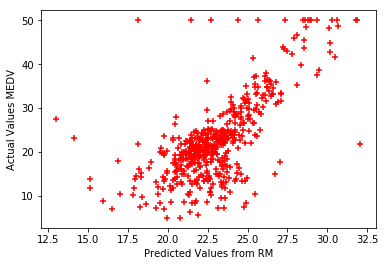

MSE: 270070.558471


In [6]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model ## mean squared error

**Check**: How does this plot relate to the model? In other words, how are the independent variable (RM) and dependent variable ("MEDV") incorporated?

Let's try it with a constant term now.

In [7]:
## With a constant

X = df["RM"]
y = targets["MEDV"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.49e-74
Time:                        22:23:56   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

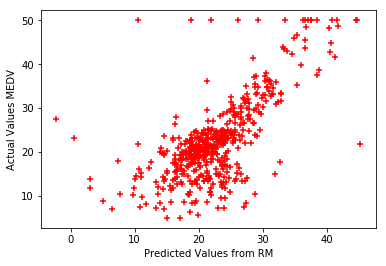

MSE: 20654.4162188


In [8]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

### Interpreting the Coefficients

With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -34.67. We also changed the slope of the `RM` regressor from 3.634 to 9.1021.

Next let's try a different predictor, `LSTAT`.


In [9]:
X = df[["LSTAT"]]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     410.9
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.71e-67
Time:                        22:25:07   Log-Likelihood:                -2182.4
No. Observations:                 506   AIC:                             4367.
Df Residuals:                     505   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

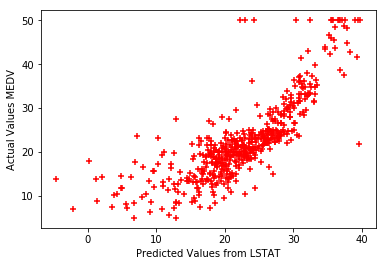

MSE: 142090.70278


In [12]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

Finally, let's fit a model using both `RM` and `LSTAT`.

In [13]:
X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Mon, 10 Jul 2017   Prob (F-statistic):               0.00
Time:                        22:25:18   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

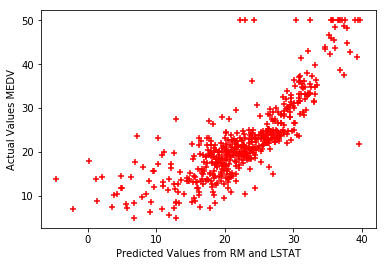

MSE: 142090.70278


In [14]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercise

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).

## Bonus

We'll go over using Scikit-Learn later this week, but you can get a head start now by repeating some of the exercises using `sklearn` instead of `statsmodels`.

### Exercises

Recreate the model fits above with `scikit-learn`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?